In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset from Kaggle

In [11]:
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for segmentation

In [12]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardizing the features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal number of clusters using Elbow method

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph

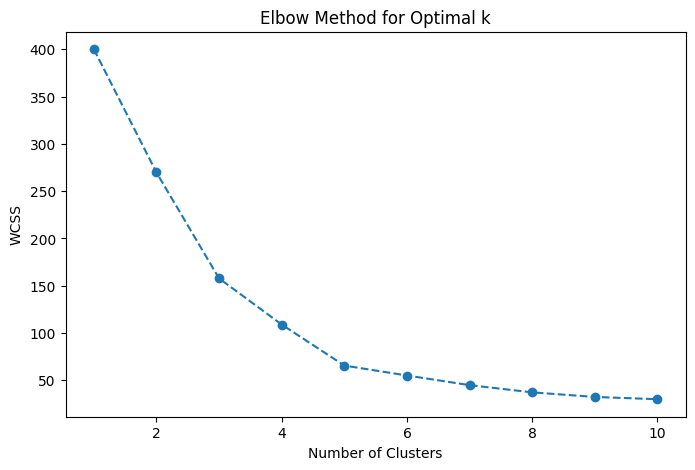

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


# Apply K-Means with the chosen number of clusters (e.g., 5)

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters

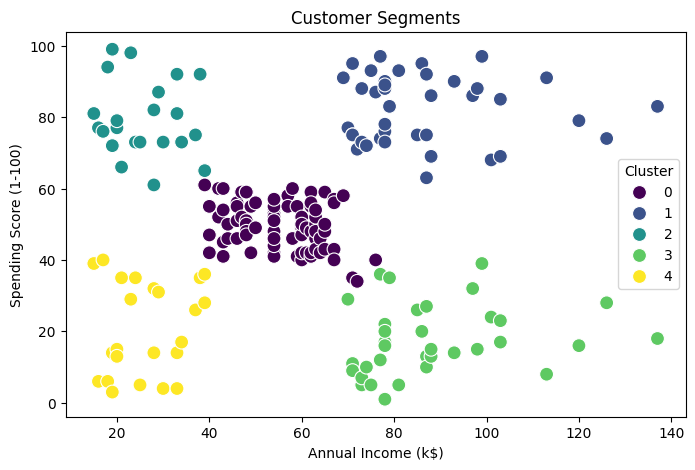

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()

# Save the segmented data

In [18]:
df.to_csv("segmented_customers.csv", index=False)
print("Customer segmentation completed and saved to segmented_customers.csv")

Customer segmentation completed and saved to segmented_customers.csv
